In [1]:
import pandas as pd
import xarray as xr
from limix.qc import quantile_gaussianize
import matplotlib.pyplot as plt

In [2]:
input_files_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/input_files/"

In [3]:
## this file will map cells to donors, it will also only including donors we have single cell data (a subset of all of HipSci donors)
sample_mapping_file = input_files_dir+"sample_mapping_file.csv"
sample_mapping = pd.read_csv(sample_mapping_file, dtype={"genotype_individual_id": str, "phenotype_sample_id": str})
sample_mapping.head()

,genotype_individual_id,phenotype_sample_id
0,HPSI0114i-joxm_1,21843_1#10
1,HPSI0314i-fafq_1,21843_1#100
2,HPSI0314i-fafq_1,21843_1#101
3,HPSI1013i-wuye_2,21843_1#102
4,HPSI0114i-joxm_1,21843_1#103


In [4]:
# environments
# cells by PCs (20)
E_file = input_files_dir+"20PCs.csv" 
E = pd.read_csv(E_file, index_col = 0)
E = xr.DataArray(E.values, dims=["cell", "pc"], coords={"cell": E.index.values, "pc": E.columns.values})
E = E.sel(cell=sample_mapping["phenotype_sample_id"].values)
assert all(E.cell.values == sample_mapping["phenotype_sample_id"].values)

In [5]:
E_all = E

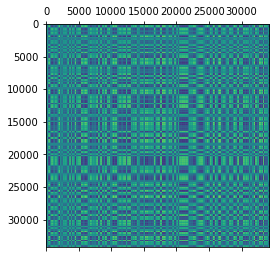

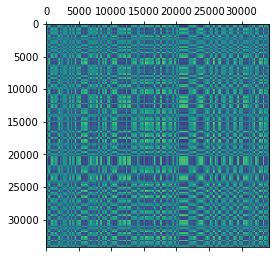

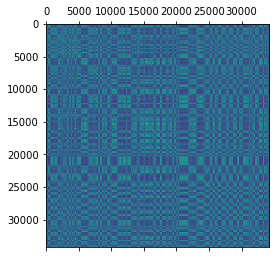

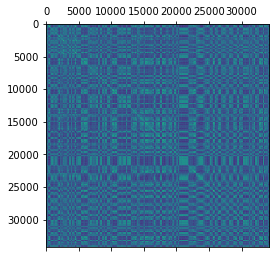

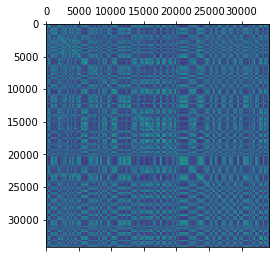

In [6]:
n_factor_list = [1, 2, 5, 10, 20]
for n_factors in n_factor_list:
    E = E_all.values[:,0:n_factors]
    plt.matshow(E @ E.T)
    plt.show()

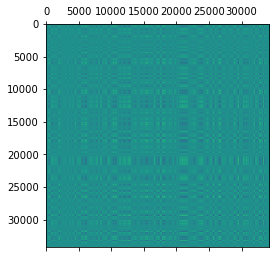

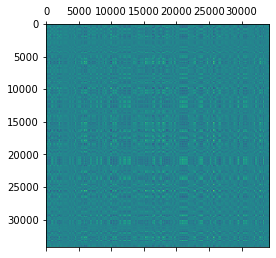

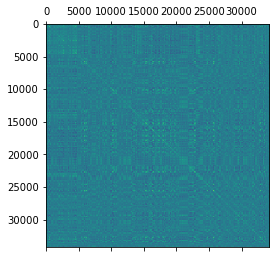

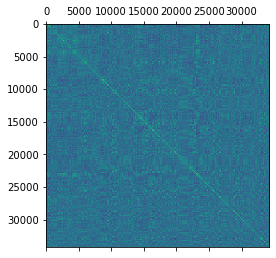

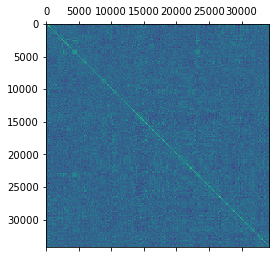

In [7]:
for n_factors in n_factor_list:
    E = E_all.values[:,0:n_factors]
    E = quantile_gaussianize(E)
    plt.matshow(E @ E.T)
    plt.show()